<a href="https://colab.research.google.com/github/yarnikitin/-/blob/master/%D0%94%D0%97_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_excel('https://www1.nyc.gov/html/gbee/downloads/excel/nyc_benchmarking_disclosure_2017_consumption_data.xlsx',sheet_name = 1)
df.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2 (self-reported),Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area (ft²),Self-Reported Gross Floor Area (ft²),Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Source EUI (kBtu/ft²),Weather Normalized Source EUI (kBtu/ft²),Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),Propane Use (kBtu),District Steam Use (kBtu),District Hot Water Use (kBtu),District Chilled Water Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Electricity Use - Grid Purchase (kWh),Weather Normalized Site Electricity (kWh),Annual Maximum Demand (kW),Annual Maximum Demand (MM/YYYY),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Water Use (All Water Sources) (kgal),Water Use Intensity (All Water Sources) (gal/ft²),Water Required?,Generation Date,DOF Benchmarking Submission Status
0,1,4593574,The Argonaut Building,NaN,NaN,1.010288e+09,1010287502,1024898,224 West 57th St,NaN,10019,Not found,Not found,Manhattan,Not found,169416,Office,"Bank Branch, Office",Office,164754.0,Bank Branch,4662.0,NaN,NaN,1909,1,95,Whole Building,Whole Building,90.0,138.4,141.0,53.8,56.2,11.3,0.1,NaN,NaN,NaN,NaN,NaN,NaN,1133475.1,NaN,NaN,1435754.7,16672.2,6551394.1,1920103.6,1920103.6,NaN,NaT,732.4,76.3,656.1,3635.5,21.46,Not found,2018-02-14,Not found
1,3,2967701,Cathedral Preparatory Seminary,NaN,NaN,4.018720e+09,4-01872-0007,4046340,56-25 92nd Street,NaN,11373,Not found,Not found,Queens,Not found,94380,K-12 School,K-12 School,K-12 School,94380.0,NaN,NaN,NaN,NaN,1963,1,100,Whole Building,NaN,100.0,43.5,46.8,28.4,31.3,2.0,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2068300.1,23243.7,616343.7,180640.0,184131.9,NaN,NaT,164.5,109.9,54.6,102.9,1.09,Not found,2018-02-14,Not found
2,4,4898531,The Nomad Hotel,NaN,NaN,1.008290e+09,1-00829-0050,1080710,1170 Broadway,NaN,10001-7507,Not found,Not found,Manhattan,Not found,125000,Hotel,Hotel,Hotel,125000.0,NaN,NaN,NaN,NaN,1999,1,85,Whole Building,Whole Building,83.0,271.1,274.7,130.2,133.7,18.8,0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8245445.1,86776.9,8033914.4,2354605.3,2354605.3,NaN,NaT,1150.2,438.0,712.3,10762.6,86.10,Not found,2018-02-14,Not found
3,5,2917939,10 West 27 Street Corp,NaN,NaN,1.008280e+09,1-00828-0053,1015657,1155 Broadway,NaN,10001,Not found,Not found,Manhattan,Not found,50000,Hotel,Hotel,Hotel,50000.0,NaN,NaN,NaN,NaN,1994,1,100,Whole Building,NaN,27.0,163.0,167.9,76.5,80.8,11.7,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1848519.4,20520.9,1976691.9,579335.2,582516.1,NaN,NaT,273.4,98.2,175.3,790.1,15.80,Not found,2018-02-14,Not found
4,6,3878205,Westbury Realty,NaN,NaN,1.000650e+09,1-00065-0024,1001105,24 John Street,NaN,10038,Not found,Not found,Manhattan,Not found,50000,Hotel,Hotel,Hotel,50000.0,NaN,NaN,NaN,NaN,2012,1,0,Whole Building,Whole Building,99.0,64.2,64.2,20.5,20.5,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1022951.6,299809.9,299809.9,NaN,NaT,90.7,0.0,90.7,143.0,2.86,Not found,2018-02-14,Not found


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34355 entries, 0 to 34354
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   Order                                                       34355 non-null  int64         
 1   Property Id                                                 34355 non-null  int64         
 2   Property Name                                               34355 non-null  object        
 3   Parent Property Id                                          1723 non-null   object        
 4   Parent Property Name                                        1723 non-null   object        
 5   BBL - 10 digits                                             33625 non-null  float64       
 6   NYC Borough, Block and Lot (BBL) self-reported              33626 non-null  object        
 7   NYC Building Identific

In [7]:
df2 = df.copy()

In [8]:
df2 = df2.loc[df2['ENERGY STAR Score'] > 0]

In [9]:
df2 = df2.select_dtypes(['int','float']).drop(['Order','Property Id','BBL - 10 digits'], axis = 1)

In [10]:
X0 = df2.copy()
y0 = X0.pop('ENERGY STAR Score')

In [11]:
from sklearn.model_selection import train_test_split
X_train0, X_test0, y_train0, y_test0 = train_test_split(X0, y0, test_size = 0.2, shuffle = True, random_state = 10)

In [12]:
def iqr(df):
  for col in df.columns:
    min = df[col].quantile(0.25) - 3 * (df[col].quantile(0.75) - df[col].quantile(0.25))
    max = df[col].quantile(0.75) + 3 * (df[col].quantile(0.75) - df[col].quantile(0.25))
    return df[df[col].between(min, max)]

In [13]:
X_train0.shape

(20363, 33)

In [14]:
X_train0 = iqr(X_train0)

In [15]:
y_train0.shape

(20363,)

In [16]:
y_train0 =  y_train0[X_train0.index]

In [17]:
y_train0.shape

(19232,)

In [18]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy = 'mean')
X_train0 = si.fit_transform(X_train0)
X_test0 = si.transform(X_test0)

In [19]:
from sklearn.ensemble import RandomForestRegressor
rf0 = RandomForestRegressor(n_estimators = 500, max_depth = 5, random_state = 21, n_jobs = -1)
rf0.fit(X_train0, y_train0)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=-1, oob_score=False,
                      random_state=21, verbose=0, warm_start=False)

In [20]:
pred_train0 = rf0.predict(X_train0)
pred_test0 = rf0.predict(X_test0)

In [21]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score

print('Train MAE:', MAE(y_train0, pred_train0))
print('Test MAE:', MAE(y_test0, pred_test0))

print('Train R2:', r2_score(y_train0, pred_train0))
print('Test R2:', r2_score(y_test0, pred_test0))

Train MAE: 11.787593527988964
Test MAE: 12.5259743022892
Train R2: 0.7606396722259252
Test R2: 0.72529987184182


In [22]:
y_test0.mean()

53.78805735611864

In [23]:
12.5/53.78

0.23242841204908887

# **Чистка**

In [24]:
df = df.loc[df['ENERGY STAR Score'] > 0]

In [25]:
col_list = ['Order','Property Id','Property Name','Parent Property Id', 
            'Parent Property Name', 'BBL - 10 digits', 'NYC Borough, Block and Lot (BBL) self-reported',
            'NYC Building Identification Number (BIN)', 'Postal Code', 
            'Street Number', 'Generation Date', 'DOF Benchmarking Submission Status']
df = df.drop(columns = col_list, axis = 1)   

In [26]:
col_list2 = []
for column in df.columns:
  if df[column].isna().sum() / len(df) >=0.5:
    col_list2.append(column)

col_list2

['Address 2 (self-reported)',
 '2nd Largest Property Use Type',
 '2nd Largest Property Use - Gross Floor Area (ft²)',
 '3rd Largest Property Use Type',
 '3rd Largest Property Use Type - Gross Floor Area (ft²)',
 'Metered Areas  (Water)',
 'Fuel Oil #1 Use (kBtu)',
 'Fuel Oil #2 Use (kBtu)',
 'Fuel Oil #4 Use (kBtu)',
 'Fuel Oil #5 & 6 Use (kBtu)',
 'Diesel #2 Use (kBtu)',
 'Propane Use (kBtu)',
 'District Steam Use (kBtu)',
 'District Hot Water Use (kBtu)',
 'District Chilled Water Use (kBtu)',
 'Annual Maximum Demand (kW)',
 'Annual Maximum Demand (MM/YYYY)']

In [27]:
df = df.drop(columns = col_list2, axis = 1)

In [28]:
df.describe(include = 'object')

,Address 1 (self-reported),Street Name,Borough,DOF Gross Floor Area (ft²),Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Metered Areas (Energy),Water Required?
count,25454,25454,25454,25454,25454,25454,25454,23909,25454
unique,17489,1,12,1,33,580,20,1,1
top,410 West 118th Street,Not found,Manhattan,Not found,Multifamily Housing,Multifamily Housing,Multifamily Housing,Whole Building,Not found
freq,70,25454,9223,25454,18973,16311,18986,23909,25454


In [29]:
col_list3 = []
for column in df.columns:
  if df[column].nunique() < 2:
    col_list3.append(column)

col_list3

['Street Name',
 'DOF Gross Floor Area (ft²)',
 'Metered Areas (Energy)',
 'Water Required?']

In [30]:
df = df.drop(columns = col_list3, axis = 1)

In [31]:
df.shape

(25454, 27)

In [32]:
df.describe(include = 'object')

,Address 1 (self-reported),Borough,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type
count,25454,25454,25454,25454,25454
unique,17489,12,33,580,20
top,410 West 118th Street,Manhattan,Multifamily Housing,Multifamily Housing,Multifamily Housing
freq,70,9223,18973,16311,18986


In [33]:
df['Address 1 (self-reported)'].value_counts().sample(10)

820 West End Avenue     1
144-70 41st Avenue      1
1901 Emmons Avenue      1
34-15 Parsons Blvd.     1
55 Overlook Terrace     1
667 Ocean Ave           2
2250 East 4th Street    2
333 Hudson Street       2
92-07 175th Street      1
240 Madison Avenue      1
Name: Address 1 (self-reported), dtype: int64

In [34]:
df['Borough'].value_counts()

Manhattan        9223
Brooklyn         6419
Bronx            5350
Queens           3992
Staten Island     427
brooklyn           24
BROOKLYN            9
bronx               4
QUEENS              2
BRONX               2
Patchogue           1
STATEN ISLAND       1
Name: Borough, dtype: int64

In [35]:
df['Borough'].str.lower().value_counts()

manhattan        9223
brooklyn         6452
bronx            5356
queens           3994
staten island     428
patchogue           1
Name: Borough, dtype: int64

In [36]:
df['Borough'] = df['Borough'].str.lower()

In [37]:
df['Primary Property Type - Self Selected'].value_counts().sample(10)

Other                                          36
Other - Specialty Hospital                      1
Courthouse                                     25
Convention Center                               4
Retail Store                                  160
Hospital (General Medical & Surgical)          85
Senior Care Community                         177
Refrigerated Warehouse                         40
Medical Office                                 79
Outpatient Rehabilitation/Physical Therapy      3
Name: Primary Property Type - Self Selected, dtype: int64

In [38]:
df['List of All Property Use Types at Property'].value_counts().sample(10)

Financial Office, Medical Office, Office, Personal Services (Health/Beauty, Dry Cleaning, etc.), Restaurant     1
Manufacturing/Industrial Plant, Multifamily Housing, Other - Restaurant/Bar                                     1
Office, Other - Restaurant/Bar                                                                                 12
Office, Other, Parking, Restaurant, Self-Storage Facility                                                       1
Fitness Center/Health Club/Gym, Food Service, Office, Retail Store                                              1
Medical Office, Office, Parking, Supermarket/Grocery Store                                                      1
Multifamily Housing, Parking, Pre-school/Daycare                                                                5
Office, Retail Store, Parking, Bank Branch                                                                      1
Medical Office, Office, Retail Store                                                    

In [39]:
df['Largest Property Use Type'].value_counts().sample(10)

Residence Hall/Dormitory       459
Retail Store                   187
Office                        2448
Non-Refrigerated Warehouse     379
Refrigerated Warehouse          37
Senior Care Community          183
Bank Branch                     11
Medical Office                  76
Supermarket/Grocery Store      103
Hotel                          471
Name: Largest Property Use Type, dtype: int64

In [40]:
df.select_dtypes(include = 'object').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25454 entries, 0 to 34353
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Address 1 (self-reported)                   25454 non-null  object
 1   Borough                                     25454 non-null  object
 2   Primary Property Type - Self Selected       25454 non-null  object
 3   List of All Property Use Types at Property  25454 non-null  object
 4   Largest Property Use Type                   25454 non-null  object
dtypes: object(5)
memory usage: 1.2+ MB


In [41]:
df.select_dtypes(include = ['int', 'float']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25454 entries, 0 to 34353
Data columns (total 22 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Self-Reported Gross Floor Area (ft²)                        25454 non-null  int64  
 1   Largest Property Use Type - Gross Floor Area (ft²)          25454 non-null  float64
 2   Year Built                                                  25454 non-null  int64  
 3   Number of Buildings                                         25454 non-null  int64  
 4   Occupancy                                                   25454 non-null  int64  
 5   ENERGY STAR Score                                           25454 non-null  float64
 6   Source EUI (kBtu/ft²)                                       25454 non-null  float64
 7   Weather Normalized Source EUI (kBtu/ft²)                    22755 non-null  float64
 

In [42]:
X = df.copy()
y = X.pop('ENERGY STAR Score')

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 5)

In [44]:
X_train, X_ohe_train = X_train.drop(['Borough'], axis =1), X_train['Borough'].copy()
X_test, X_ohe_test = X_test.drop(['Borough'], axis =1),  X_test['Borough'].copy()

In [45]:
X_ohe_train.head()

15743     brooklyn
4069     manhattan
23948     brooklyn
8975     manhattan
15436     brooklyn
Name: Borough, dtype: object

In [46]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse = False)
X_ohe_train = ohe.fit_transform(X_ohe_train.values.reshape(-1, 1))
X_ohe_train = pd.DataFrame(X_ohe_train, columns = ohe.get_feature_names())
X_ohe_test = ohe.transform(X_ohe_test.values.reshape(-1, 1))
X_ohe_test = pd.DataFrame(X_ohe_test, columns = ohe.get_feature_names())


In [47]:
X_ohe_train.head()

,x0_bronx,x0_brooklyn,x0_manhattan,x0_patchogue,x0_queens,x0_staten island
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0


In [48]:
X_train, X_fr_train = X_train.drop(['Primary Property Type - Self Selected','Largest Property Use Type'], axis =1), X_train[['Primary Property Type - Self Selected','Largest Property Use Type']].copy()
X_test, X_fr_test = X_test.drop(['Primary Property Type - Self Selected','Largest Property Use Type'], axis =1),  X_test[['Primary Property Type - Self Selected','Largest Property Use Type']].copy()

In [51]:
X_fr_train.head()

,Primary Property Type - Self Selected,Largest Property Use Type
15743,Multifamily Housing,Multifamily Housing
4069,Office,Office
23948,Multifamily Housing,Multifamily Housing
8975,Multifamily Housing,Multifamily Housing
15436,Multifamily Housing,Multifamily Housing


In [53]:
!pip install category_encoders

In [54]:
from category_encoders.count import CountEncoder

ce = CountEncoder(handle_unknown = 1)
X_fr_train = ce.fit_transform(X_fr_train)
X_fr_test = ce.transform(X_fr_test)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [55]:
X_train, X_tf_train = X_train.drop(['List of All Property Use Types at Property'], axis =1), X_train['List of All Property Use Types at Property'].copy()
X_test, X_tf_test = X_test.drop(['List of All Property Use Types at Property'], axis =1),  X_test['List of All Property Use Types at Property'].copy()

In [56]:
X_tf_train.head()

15743                                  Multifamily Housing
4069     Office, Parking, Performing Arts, Residence Ha...
23948                                  Multifamily Housing
8975       Mailing Center/Post Office, Multifamily Housing
15436                                  Multifamily Housing
Name: List of All Property Use Types at Property, dtype: object

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(max_features = 50, stop_words = 'english', token_pattern=r'(?u)\b[A-Za-z]+\b')
X_tf_train = vec.fit_transform(X_tf_train)
X_tf_test = vec.transform(X_tf_test)

X_tf_train = pd.DataFrame(X_tf_train.toarray(), columns=vec.get_feature_names())
X_tf_test = pd.DataFrame(X_tf_test.toarray(), columns=vec.get_feature_names())

In [60]:
X_tf_train.head()

,assembly,bank,bar,branch,care,center,clinic,community,convenience,data,distribution,dormitory,entertainment,facility,fast,financial,food,gas,general,grocery,hall,health,hospital,hotel,housing,k,medical,multifamily,non,office,outpatient,parking,pool,public,recreation,refrigerated,residence,restaurant,retail,school,senior,services,station,store,supermarket,surgical,swimming,urgent,warehouse,worship
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.707107,0.0,0.0,0.707107,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.503731,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500869,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.311168,0.0,0.380544,0.0,0.0,0.0,0.0,0.503731,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.707107,0.0,0.0,0.707107,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.848005,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.191667,0.0,0.0,0.191667,0.0,0.455428,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.707107,0.0,0.0,0.707107,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
X_train = X_train.drop('Address 1 (self-reported)', axis = 1)
X_test = X_test.drop('Address 1 (self-reported)', axis = 1)

In [62]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20363 entries, 15743 to 3816
Data columns (total 21 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Self-Reported Gross Floor Area (ft²)                        20363 non-null  int64  
 1   Largest Property Use Type - Gross Floor Area (ft²)          20363 non-null  float64
 2   Year Built                                                  20363 non-null  int64  
 3   Number of Buildings                                         20363 non-null  int64  
 4   Occupancy                                                   20363 non-null  int64  
 5   Source EUI (kBtu/ft²)                                       20363 non-null  float64
 6   Weather Normalized Source EUI (kBtu/ft²)                    18198 non-null  float64
 7   Site EUI (kBtu/ft²)                                         20363 non-null  float6

In [63]:
from sklearn.preprocessing import MinMaxScaler

mc = MinMaxScaler()
cols = X_train.columns
X_train = mc.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns = cols)
X_test= mc.transform(X_test)
X_test = pd.DataFrame(X_test, columns = cols)

In [64]:
X_train = pd.concat([X_train.reset_index(drop=True),
                     X_fr_train.reset_index(drop=True),
                     X_tf_train.reset_index(drop=True),
                     X_ohe_train.reset_index(drop=True)], 
                    axis = 1, ignore_index=False)
y_train = y_train.reset_index(drop=True)

X_test = pd.concat([X_test.reset_index(drop=True),
                     X_fr_test.reset_index(drop=True),
                     X_tf_test.reset_index(drop=True),
                     X_ohe_test.reset_index(drop=True)], 
                    axis = 1, ignore_index=False)
y_test = y_test.reset_index(drop=True)

In [65]:
X_train.shape

(20363, 79)

In [66]:
y_train.shape

(20363,)

In [67]:
X_test.shape

(5091, 79)

In [68]:
y_test.shape

(5091,)

In [69]:
X_train.head()

,Self-Reported Gross Floor Area (ft²),Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings,Occupancy,Source EUI (kBtu/ft²),Weather Normalized Source EUI (kBtu/ft²),Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Electricity Use - Grid Purchase (kWh),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Water Use (All Water Sources) (kgal),Water Use Intensity (All Water Sources) (gal/ft²),Primary Property Type - Self Selected,Largest Property Use Type,assembly,bank,bar,branch,care,center,clinic,community,convenience,data,distribution,dormitory,entertainment,facility,fast,financial,food,gas,general,grocery,hall,health,hospital,hotel,housing,k,medical,multifamily,non,office,outpatient,parking,pool,public,recreation,refrigerated,residence,restaurant,retail,school,senior,services,station,store,supermarket,surgical,swimming,urgent,warehouse,worship,x0_bronx,x0_brooklyn,x0_manhattan,x0_patchogue,x0_queens,x0_staten island
0,0.010688,0.010688,0.775656,0.006211,0.95,0.000468,0.000503,0.000385,0.000416,0.010885,0.000388,0.000536,0.000584,0.003155,0.003155,0.003295,0.000475,0.000536,0.018549,0.001850,0.001207,15177,15188,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.707107,0.0,0.0,0.707107,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.037718,0.026043,0.930788,0.006211,1.00,0.001305,0.001320,0.000602,0.000619,0.070225,NaN,NaN,NaN,0.072581,0.072581,0.072764,0.003545,0.000000,0.021939,0.005522,0.001039,1939,1976,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.503731,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500869,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.311168,0.0,0.380544,0.0,0.0,0.0,0.0,0.503731,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.018386,0.018386,0.727924,0.006211,1.00,0.000443,0.000469,0.000355,0.000380,0.011236,0.000340,0.000824,0.000892,0.005658,0.005658,0.005767,0.000753,0.000824,0.018621,0.003563,0.001365,15177,15188,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.707107,0.0,0.0,0.707107,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.018783,0.017665,0.906921,0.006211,1.00,0.000525,0.000543,0.000328,0.000352,0.021419,0.000000,0.000029,0.000030,0.011276,0.011276,0.011075,0.000961,0.000865,0.018796,0.002016,0.000756,15177,15188,0.0,0.0,0.0,0.0,0.0,0.848005,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.191667,0.0,0.0,0.191667,0.0,0.455428,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.005651,0.005651,0.806683,0.006211,1.00,0.000634,0.000664,0.000465,0.000494,0.021770,0.000388,0.000292,0.000317,0.003474,0.003474,0.003506,0.000331,0.000323,0.018558,0.001033,0.001247,15177,15188,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.707107,0.0,0.0,0.707107,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [70]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20363 entries, 0 to 20362
Data columns (total 79 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Self-Reported Gross Floor Area (ft²)                        20363 non-null  float64
 1   Largest Property Use Type - Gross Floor Area (ft²)          20363 non-null  float64
 2   Year Built                                                  20363 non-null  float64
 3   Number of Buildings                                         20363 non-null  float64
 4   Occupancy                                                   20363 non-null  float64
 5   Source EUI (kBtu/ft²)                                       20363 non-null  float64
 6   Weather Normalized Source EUI (kBtu/ft²)                    18198 non-null  float64
 7   Site EUI (kBtu/ft²)                                         20363 non-null  float64
 

In [71]:
X_train = iqr(X_train)

In [72]:
X_train.shape

(19212, 79)

In [73]:
y_train = y_train[X_train.index]

In [74]:
(X_train.isnull().sum() / len(X_train)).sort_values(ascending = False)

Water Use Intensity (All Water Sources) (gal/ft²)             0.434312
Water Use (All Water Sources) (kgal)                          0.434312
Weather Normalized Site Natural Gas Use (therms)              0.107641
Weather Normalized Site Natural Gas Intensity (therms/ft²)    0.107641
Weather Normalized Source EUI (kBtu/ft²)                      0.107121
                                                                ...   
outpatient                                                    0.000000
parking                                                       0.000000
pool                                                          0.000000
public                                                        0.000000
Self-Reported Gross Floor Area (ft²)                          0.000000
Length: 79, dtype: float64

In [75]:
from sklearn.impute import KNNImputer

knn = KNNImputer()
cols = X_train.columns
X_train = knn.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns = cols)
X_test= knn.transform(X_test)
X_test = pd.DataFrame(X_test, columns = cols)

In [76]:
(X_train.isnull().sum() / len(X_train)).sort_values(ascending = False)

x0_staten island                         0.0
center                                   0.0
Primary Property Type - Self Selected    0.0
Largest Property Use Type                0.0
assembly                                 0.0
                                        ... 
outpatient                               0.0
parking                                  0.0
pool                                     0.0
public                                   0.0
Self-Reported Gross Floor Area (ft²)     0.0
Length: 79, dtype: float64

In [77]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 500, max_depth = 5, random_state = 42, n_jobs = -1)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [78]:
pred_train = rf.predict(X_train)
pred_test = rf.predict(X_test)

In [79]:
print('Train MAE:', MAE(y_train, pred_train))
print('Test MAE:', MAE(y_test, pred_test))

print('Train R2:', r2_score(y_train, pred_train))
print('Test R2:', r2_score(y_test, pred_test))



Train MAE: 10.444146702863812
Test MAE: 10.7810560035306
Train R2: 0.8118027112818965
Test R2: 0.797638333910152


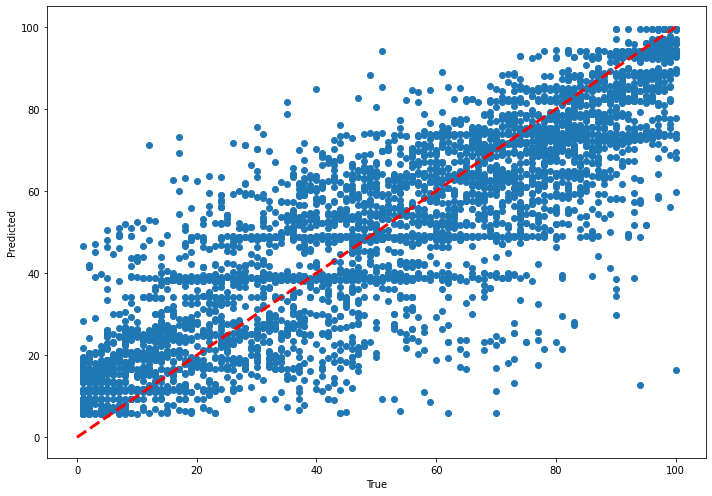

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(y_test, pred_test)
plt.plot([0, 100], [0, 100], '--k', color='red', linewidth=3)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.tight_layout()

In [81]:
feature_scores = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores.head(30)

Source EUI (kBtu/ft²)                                         0.801093
Site EUI (kBtu/ft²)                                           0.129263
Largest Property Use Type                                     0.031765
housing                                                       0.010014
multifamily                                                   0.008825
Weather Normalized Site Electricity Intensity (kWh/ft²)       0.003604
Primary Property Type - Self Selected                         0.002391
office                                                        0.002329
non                                                           0.002202
warehouse                                                     0.001346
refrigerated                                                  0.001312
Weather Normalized Source EUI (kBtu/ft²)                      0.001172
Water Use (All Water Sources) (kgal)                          0.000565
grocery                                                       0.000502
superm